In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 50)

In [2]:
df_OR_branches = pd.read_csv('./formatted/OR-branches.csv', index_col=0, header=None).T
df_OR_conflicts = pd.read_csv('./formatted/OR-conflicts.csv', index_col=0, header=None).T
df_OR_obj_value = pd.read_csv('./formatted/OR-obj_value.csv', index_col=0, header=None).T
df_OR_status    = pd.read_csv('./formatted/OR-status.csv', index_col=0, header=None).T
df_OR_wall_time = pd.read_csv('./formatted/OR-wall_time.csv', index_col=0, header=None).T

df_PL_conflicts = pd.read_csv('./formatted/PL-conflicts.csv', index_col=0, header=None).T
df_PL_obj_value = pd.read_csv('./formatted/PL-obj_value.csv', index_col=0, header=None).T
df_PL_status    = pd.read_csv('./formatted/PL-status.csv', index_col=0, header=None).T
df_PL_wall_time = pd.read_csv('./formatted/PL-wall_time.csv', index_col=0, header=None).T

df_parameters = pd.read_csv('./formatted/parameters.csv', index_col=0, header=None).T


In [3]:
# df_OR_conflicts.head(10)
# df_OR_obj_value.head(10)
# df_OR_status.head(10)
# df_OR_wall_time.head(10)

# df_parameters.head(100)

# df_PL_obj_value.head(10)
# df_PL_status.head(100)
# df_PL_conflicts.head(100)
# df_PL_wall_time.head(100)

In [4]:
obj_value_n_jobs = pd.concat(
    [
        df_parameters['n_jobs'],
        df_OR_obj_value.rename(columns = {'n_jobs':'OR-Tools'})['OR-Tools'], 
        df_PL_obj_value.rename(columns = {'n_jobs':'SICstus'})['SICstus']
    ], axis=1)[:10]

obj_value_n_jobs['OR-Tools'] = obj_value_n_jobs['OR-Tools'].astype(float) # Need to convert or-tools from string to float and then to int
obj_value_n_jobs = obj_value_n_jobs.astype(int)

obj_value_n_jobs_sns = obj_value_n_jobs.melt('n_jobs', var_name='Tool', value_name='Objective Function')

obj_value_n_jobs_sns.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

# ---------------------

status_n_jobs = pd.concat(
    [
        df_parameters['n_jobs'],
        df_OR_status.rename(columns = {'n_jobs':'OR-Tools'})['OR-Tools'], 
        df_PL_status.rename(columns = {'n_jobs':'SICstus'})['SICstus']
    ], axis=1)[:10]

status_n_jobs_sns = status_n_jobs.melt('n_jobs', var_name='Tool', value_name='Status')

status_n_jobs_sns['Status'] = status_n_jobs_sns['Status'].str.strip().replace({'optimality': 'OPTIMAL', 'success': 'FEASIBLE'})

status_n_jobs_sns.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

# ---------------------

perc_alt_jobs = pd.concat(
    [
        df_parameters['percent_alt_jobs'],
        df_OR_conflicts.rename(columns = {'percent_alt_machines':'OR-Tools'})['OR-Tools'], 
        df_PL_conflicts.rename(columns = {'percent_alt_machines':'SICstus'})['SICstus']
    ], axis=1)[:11]

perc_alt_jobs_sns = perc_alt_jobs.melt('percent_alt_jobs', var_name='Tool', value_name='# Conflicts')

perc_alt_jobs_sns['# Conflicts'] = perc_alt_jobs_sns['# Conflicts'].astype(int)

perc_alt_jobs_sns.rename(columns={'percent_alt_jobs': 'Alternative Jobs (%)'}, inplace=True)

# ---------------------

time_exec_n_jobs = pd.concat(
    [
        df_parameters['n_jobs'],
        df_OR_wall_time.rename(columns = {'n_jobs':'OR-Tools'})['OR-Tools'], 
        df_PL_wall_time.rename(columns = {'n_jobs':'SICstus'})['SICstus']
    ], axis=1)[:10]

time_exec_n_jobs_sns = time_exec_n_jobs.melt('n_jobs', var_name='Tool', value_name='Wall Time')
time_exec_n_jobs_sns['Wall Time'] = time_exec_n_jobs_sns['Wall Time'].astype(float)

time_exec_n_jobs_sns.rename(columns={'n_jobs': '# Jobs'}, inplace=True)

# ---------------------

prod_range = pd.concat(
    [
        df_parameters['production_range'],
        df_OR_conflicts.rename(columns = {'production_range':'OR-Tools'})['OR-Tools'], 
        df_PL_conflicts.rename(columns = {'production_range':'SICstus'})['SICstus']
    ], axis=1)[:13]

prod_range_sns = prod_range.melt('production_range', var_name='Tool', value_name='# Conflicts')

prod_range_sns['# Conflicts'] = prod_range_sns['# Conflicts'].astype(int)

prod_range_sns.rename(columns={'production_range': 'Production Range'}, inplace=True)
prod_range_sns

# ---------------------

n_machines_status = pd.concat(
    [
        df_parameters['n_machines'],
        df_OR_status.rename(columns = {'n_machines':'OR-Tools'})['OR-Tools'], 
        df_PL_status.rename(columns = {'n_machines':'SICstus'})['SICstus']
    ], axis=1)[:10]

n_machines_status_sns = n_machines_status.melt('n_machines', var_name='Tool', value_name='Status')
n_machines_status_sns['Status'] = n_machines_status_sns['Status'].str.strip().replace({'optimality': 'OPTIMAL', 'success': 'FEASIBLE', 'time_out': 'TIMEOUT'})
n_machines_status_sns.rename(columns={'n_machines': '# Machines'}, inplace=True)
n_machines_status_sns

# ---------------------

avg_size_task_wall_time = pd.concat(
    [
        df_parameters['average_size_task'],
        df_OR_wall_time.rename(columns = {'average_size_task':'OR-Tools'})['OR-Tools'], 
        df_PL_wall_time.rename(columns = {'average_size_task':'SICstus'})['SICstus']
    ], axis=1)[:16]

avg_size_task_wall_time = avg_size_task_wall_time.melt('average_size_task', var_name='Tool', value_name='Wall Time')
avg_size_task_wall_time['Wall Time'] = avg_size_task_wall_time['Wall Time'].astype(float)
avg_size_task_wall_time.rename(columns={'average_size_task': 'Average Task Size'}, inplace=True)
avg_size_task_wall_time

# ---------------------

branches_n_jobs = pd.concat(
    [
        df_parameters['n_jobs'],
        df_OR_branches.rename(columns = {'n_jobs':'OR-Tools'})['OR-Tools']
    ], axis=1)[:10]
branches_n_jobs_sns = branches_n_jobs.melt('n_jobs', var_name='Tool', value_name='# Branches')
branches_n_jobs_sns['# Branches'] = branches_n_jobs_sns['# Branches'].astype(int)

branches_n_jobs_sns.rename(columns={'n_jobs': '# Jobs'}, inplace=True)
branches_n_jobs_sns

,# Jobs,Tool,# Branches
0,2,OR-Tools,16
1,5,OR-Tools,27
2,10,OR-Tools,80
3,20,OR-Tools,120
4,40,OR-Tools,2336
5,60,OR-Tools,388
6,80,OR-Tools,7884
7,100,OR-Tools,14155
8,125,OR-Tools,56228
9,150,OR-Tools,7077


# Graphs

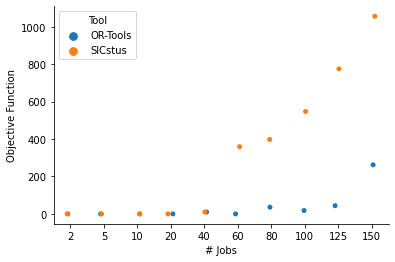

In [5]:
# X: n jobs | Y: obj func

# ax1 = obj_value_n_jobs.plot(kind='scatter', x='n_jobs', y='OR_obj_value', color='b', label='OR-Tools')
# ax2 = obj_value_n_jobs.plot(kind='scatter', x='n_jobs', y='PL_obj_value', color='g', label='SICstus', ax=ax1)

# h2, l2 = ax2.get_legend_handles_labels()

# plt.legend(h2, l2, loc=2)
# plt.xlabel('# Jobs')
# plt.ylabel('Objective Function')

# plt.show()

sns.stripplot(x='# Jobs', y='Objective Function', data=obj_value_n_jobs_sns, hue='Tool', jitter=0.1)
sns.despine()

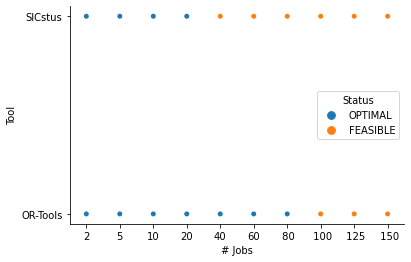

In [6]:
sns.stripplot(x='# Jobs', y='Tool', data=status_n_jobs_sns, hue='Status', jitter=0)
sns.despine()

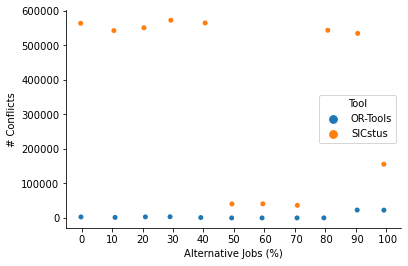

In [7]:
sns.stripplot(x='Alternative Jobs (%)', y='# Conflicts', data=perc_alt_jobs_sns, hue='Tool', jitter=0.1)
sns.despine()

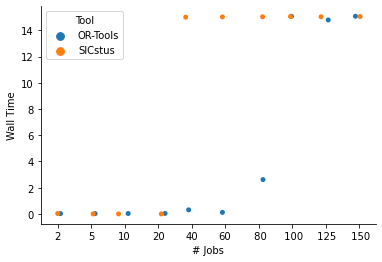

In [8]:
sns.stripplot(x='# Jobs', y='Wall Time', data=time_exec_n_jobs_sns, hue='Tool', jitter=0.25)
sns.despine()

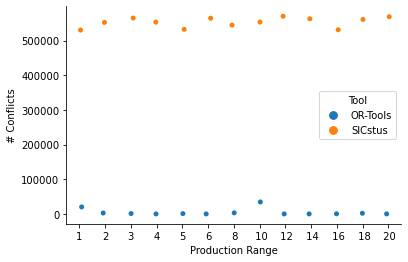

In [9]:
sns.stripplot(x='Production Range', y='# Conflicts', data=prod_range_sns, hue='Tool', jitter=0.1)
sns.despine()

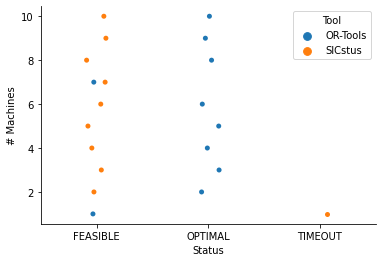

In [10]:
sns.stripplot(x='Status', y='# Machines', data=n_machines_status_sns, hue='Tool', jitter=0.1)
sns.despine()

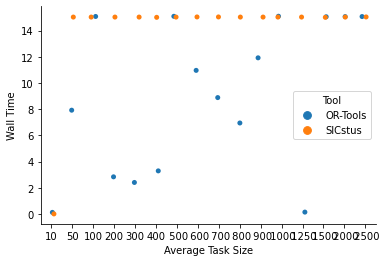

In [11]:
sns.stripplot(x='Average Task Size', y='Wall Time', data=avg_size_task_wall_time, hue='Tool', jitter=0.20)
sns.despine()

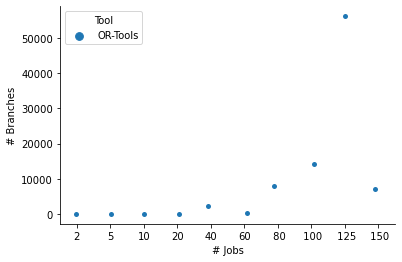

In [12]:
sns.stripplot(x='# Jobs', y='# Branches', data=branches_n_jobs_sns, hue='Tool', jitter=0.1)
sns.despine()